### Model Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix, roc_curve, auc, accuracy_score, roc_auc_score
from scipy.stats import zscore
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
data = pd.read_csv("Life Expectancy Data.csv")

### About Dataset

In [ ]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Preprocessing and Outlier Removing Using Z-Score

In [ ]:
# --- Preprocessing ---
# Keep only numeric columns
df = data.select_dtypes(include=[np.number]).dropna()

In [ ]:
# Show before removing outliers
print(f"\nShape before outlier removal: {df.shape}")


Shape before outlier removal: (1649, 20)


In [ ]:
# Compute Z-scores
z_scores = np.abs(zscore(df))

In [ ]:
# Define threshold (common choice = 3)
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

In [ ]:
# Show after removing outliers
print(f"Shape after outlier removal: {df_no_outliers.shape}")

Shape after outlier removal: (1290, 20)


In [ ]:
print(df.columns.tolist())

['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


### Train and Test Split

In [ ]:
# Features and target
X = df.drop(["Life expectancy "], axis = 1)
y = df['Life expectancy ']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# --- Evaluation Metrics ---
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]   # number of samples
p = X_test.shape[1]   # number of predictors/features


In [ ]:
# Adjusted R² formula
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print("\n--- Model Evaluation ---")
print(f"R² Score       : {r2:.4f}")
print(f"Adjusted R²    : {adj_r2:.4f}")
print(f"RMSE           : {rmse:.2f}")
print(f"MSE            : {mse:.2f}")
print(f"MAE            : {mae:.2f}")


--- Model Evaluation ---
R² Score       : 0.8160
Adjusted R²    : 0.8047
RMSE           : 3.62
MSE            : 13.07
MAE            : 2.74


### Actual vs Predicted Plot

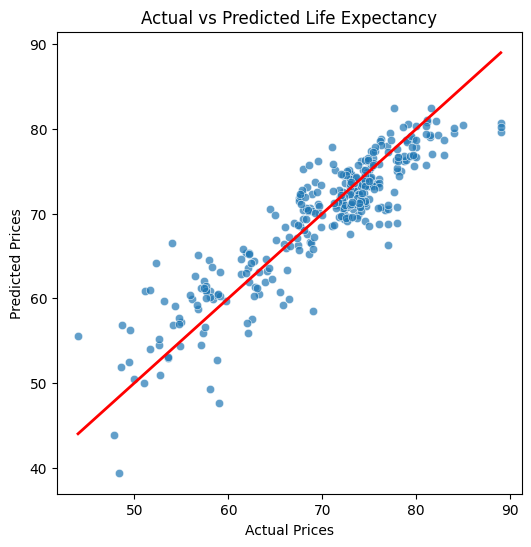

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Life Expectancy")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", lw=2)
plt.show()

# Improving score by removing null values and adding dummy data

## Model Import

In [ ]:
data = pd.read_csv("Life Expectancy Data.csv")

## Remving null values

In [ ]:
#This piece of code will fill the null values of the selected feature with its mean.
# This one is for filling Nans in 'Life expectancy' column.

data['Life expectancy ']=data['Life expectancy '].fillna(value=data['Life expectancy '].mean())

# Lets also do the same for Adult Mortality.

data['Adult Mortality']=data['Adult Mortality'].fillna(value=data['Adult Mortality'].mean())

data['Alcohol']=data['Alcohol'].fillna(value=data['Alcohol'].mean())

data[data['Diphtheria ']>80.0]['Hepatitis B'].mean()

data[(data['Life expectancy ']>80) & (data['Life expectancy ']<=90)]['Schooling'].mean()

# Example of how iam deciding values for filling Nans above
# You can see above in range above 80 we got avg. as 16.5 so we have imputed it that way.

np.float64(16.51050420168067)

In [ ]:
data = data.dropna()

In [ ]:
a=list(data.columns)
b=[]
for i in a:
    c=data[i].isnull().sum()
    b.append(c)
null_df=pd.DataFrame({'Feature name':a,'no. of Nan':b})
null_df

,Feature name,no. of Nan
0,Country,0
1,Year,0
2,Status,0
3,Life expectancy,0
4,Adult Mortality,0
5,infant deaths,0
6,Alcohol,0
7,percentage expenditure,0
8,Hepatitis B,0
9,Measles,0


## droping and filling dummy data

In [ ]:
X=data.drop('Life expectancy ',axis=1)
y=data['Life expectancy ']

In [ ]:
Country_dummy=pd.get_dummies(X['Country'])
status_dummy=pd.get_dummies(X['Status'])
# Dummy variables for status feature.

In [ ]:
X.drop(['Country','Status'],inplace=True,axis=1)

In [ ]:
X=pd.concat([X,Country_dummy,status_dummy],axis=1)

In [ ]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1650 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1650 non-null   object 
 1   Year                             1650 non-null   int64  
 2   Status                           1650 non-null   object 
 3   Life expectancy                  1650 non-null   float64
 4   Adult Mortality                  1650 non-null   float64
 5   infant deaths                    1650 non-null   int64  
 6   Alcohol                          1650 non-null   float64
 7   percentage expenditure           1650 non-null   float64
 8   Hepatitis B                      1650 non-null   float64
 9   Measles                          1650 non-null   int64  
 10   BMI                             1650 non-null   float64
 11  under-five deaths                1650 non-null   int64  
 12  Polio                    

## Outlier Removing Using Z-score

In [ ]:
# --- Preprocessing ---
# Keep only numeric columns
df = data.select_dtypes(include=[np.number]).dropna()

In [ ]:
# Show before removing outliers
print(f"\nShape before outlier removal: {df.shape}")


Shape before outlier removal: (1650, 20)


In [ ]:
# Compute Z-scores
z_scores = np.abs(zscore(df))

In [ ]:
# Define threshold (common choice = 3)
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

In [ ]:
# Show after removing outliers
print(f"Shape after outlier removal: {df_no_outliers.shape}")

Shape after outlier removal: (1291, 20)


In [ ]:
print(df.columns.tolist())

['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


## Train and Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
Linear_model= LinearRegression()

In [ ]:
Linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=Linear_model.predict(X_test)

In [ ]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]   # number of samples
p = X_test.shape[1]   # number of features
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print("R² Score      :", round(r2, 4))
print("Adjusted R²   :", round(adj_r2, 4))
print("RMSE          :", round(rmse, 4))
print("MSE           :", round(mse, 4))
print("MAE           :", round(mae, 4))

R² Score      : 0.9532
Adjusted R²   : 0.9319
RMSE          : 1.9131
MSE           : 3.6599
MAE           : 1.1491


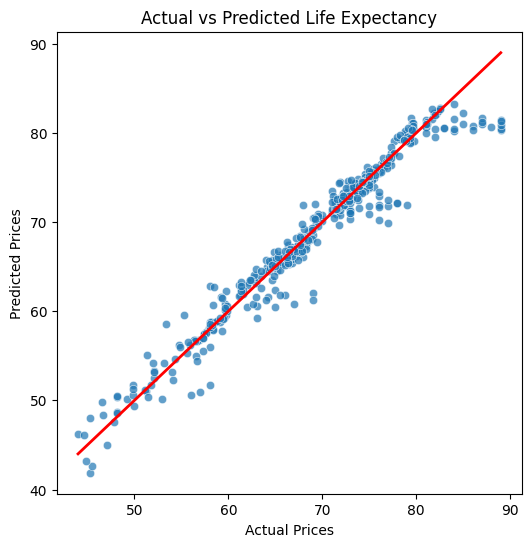

In [ ]:
# Plot predictions vs actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Life Expectancy")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", lw=2)
plt.show()